# Movie Reviews

In [1]:
import qiskit
import math
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Data

In [2]:
#HyperParameters
vocab_size=5000;
max_length=256; # It is should 2^ num_qubits.

In [3]:
from tensorflow import keras
imdb= keras.datasets.imdb
(train_data,train_labels), (test_data, test_labels)= imdb.load_data(num_words=vocab_size)
word_index = imdb.get_word_index()
word_index = {k: (v+3) for k,v in word_index.items()}
train_data=[[w for w in i if not w==2]for i in train_data]
test_data=[[w for w in i if not w==2]for i in test_data]
word_index["<PAD>"]=0
word_index["<START>"]=1
word_index["<UNK>"]=2
word_index["<UNUSED>"]=3
itos= dict([(value,key) for (key,value) in word_index.items()])
def decode_review(text):
  return " ".join([itos.get(i,"?") for i in text ])

In [4]:
new_data=[(i,train_labels[j]) for j,i in enumerate(train_data) if len(i)<max_length+1]
new_data=new_data + [(i,test_labels[j]) for j,i in enumerate(test_data) if len(i)<max_length+1]
data,labels= zip(*new_data)
#Padding
num_data=200# How many datapoints to consider
data=data[:200]
labels=labels[:200]
#Padding
data= keras.preprocessing.sequence.pad_sequences(data,maxlen=max_length,padding="post" )

# Splitting the data

from sklearn.model_selection import train_test_split
train_data,test_data,train_labels,test_labels= train_test_split(data,labels,train_size=0.72)
m_data=data
m_labels=labels


In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras
#Hyperparameter
max_length=51

In [6]:
import pandas as pd
df = pd.read_csv('medquad.csv', usecols=['question', 'focus_area'])
arr=df.to_numpy()
# Label count and index
label_count={}
for i in arr:
  label_count[i[-1]]=label_count.get(i[-1],0)+1
labels_count=sorted(label_count.items(),key=lambda x:-x[1])
label_index={i[0]:j for j,i in enumerate(labels_count)}
#Word count and index
word_counts={}
for i in arr:
  for j in i[0].split():
    word_counts[j]=word_counts.get(j,0)+1
word_counts=sorted(word_counts.items(),key=lambda x:-x[1])
word_index={i[0]:j+1 for j,i in enumerate(word_counts)}
word_index['PAD']=0
word_index=dict(sorted(word_index.items(),key=lambda x:x[1]))
#Tokenization
def tokenization(words):
  token=[]
  for i in words:
    k=[]
    for j in i.split():
      k.append(word_index[j])
    token.append(k)
  return token
# Tokenizing the data
tokenized_data=tokenization([i[0] for i in arr])
labels=[label_index[i[1]] for i in arr]
#Padding the data
data= keras.preprocessing.sequence.pad_sequences(tokenized_data,maxlen=max_length,padding="post")
#Only selecting two labels
new_data,label=[],[]
for i,j in zip(data,labels):
  if j<2:
    new_data.append(i)
    label.append(j)
combined_data=pd.DataFrame(np.c_[new_data,label])
h_data=new_data
h_label= label

In [7]:
import pandas as pd
df = pd.read_csv('medquad.csv', usecols=['question', 'focus_area'])
arr=df.to_numpy()
# Label count and index
label_count={}
for i in arr:
  label_count[i[-1]]=label_count.get(i[-1],0)+1
labels_count=sorted(label_count.items(),key=lambda x:-x[1])
label_index={i[0]:j for j,i in enumerate(labels_count)}
#Word count and index
word_counts={}
for i in arr:
  for j in i[0].split():
    word_counts[j]=word_counts.get(j,0)+1
word_counts=sorted(word_counts.items(),key=lambda x:-x[1])
word_index={i[0]:j+1 for j,i in enumerate(word_counts)}
word_index['PAD']=0
word_index=dict(sorted(word_index.items(),key=lambda x:x[1]))
#Tokenization
def tokenization(words):
  token=[]
  for i in words:
    k=[]
    for j in i.split():
      k.append(word_index[j])
    token.append(k)
  return token
# Tokenizing the data
tokenized_data=tokenization([i[0] for i in arr])
labels=[label_index[i[1]] for i in arr]
#Padding the data
data= keras.preprocessing.sequence.pad_sequences(tokenized_data,maxlen=max_length,padding="post")
#Only selecting two labels
new_data,label=[],[]
for i,j in zip(data,labels):
  if j<2:
    new_data.append(i)
    label.append(j)
combined_data=pd.DataFrame(np.c_[new_data,label])
h_data=new_data
h_label= label

# QKE


In [5]:
import pandas as pd
train_data=pd.DataFrame(train_data)
train_labels=pd.DataFrame(train_labels)
test_data=pd.DataFrame(test_data)
test_labels=pd.DataFrame(test_labels)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(144, 256)
(56, 256)
(144, 1)
(56, 1)


In [6]:
train_data_with_labels = pd.concat([train_data, train_labels], axis=1)
train_data_with_labels.columns = list(train_data.columns) + ['Cluster']
train_data_with_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Cluster
0,1,249,1323,7,61,113,10,10,13,1637,...,0,0,0,0,0,0,0,0,0,0
1,1,13,219,14,33,4,22,1413,12,16,...,0,0,0,0,0,0,0,0,0,0
2,1,13,296,4491,1135,18,4,86,58,11,...,0,0,0,0,0,0,0,0,0,1
3,1,14,22,9,40,35,7,4,12,47,...,0,0,0,0,0,0,0,0,0,1
4,1,3199,2609,625,611,645,54,29,4365,4,...,0,0,0,0,0,0,0,0,0,1


In [7]:
test_data_with_labels = pd.concat([test_data, test_labels], axis=1)

# Rename the last column to 'Cluster'
test_data_with_labels.columns = list(test_data.columns) + ['Cluster']
test_data_with_labels.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Cluster
0,1,408,6,1596,5,4326,239,17,884,1611,...,0,0,0,0,0,0,0,0,0,1
1,1,449,61,558,13,1247,14,20,5,13,...,0,0,0,0,0,0,0,0,0,0
2,1,4679,2784,1482,11,450,7,134,364,352,...,0,0,0,0,0,0,0,0,0,1
3,1,1230,3765,566,97,189,102,86,7,32,...,0,0,0,0,0,0,0,0,0,0
4,1,13,244,1713,1681,8,97,134,243,7,...,0,0,0,0,0,0,0,0,0,0


In [8]:
combined_data = pd.concat([train_data_with_labels, test_data_with_labels], axis=0)
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Cluster
0,1,249,1323,7,61,113,10,10,13,1637,...,0,0,0,0,0,0,0,0,0,0
1,1,13,219,14,33,4,22,1413,12,16,...,0,0,0,0,0,0,0,0,0,0
2,1,13,296,4491,1135,18,4,86,58,11,...,0,0,0,0,0,0,0,0,0,1
3,1,14,22,9,40,35,7,4,12,47,...,0,0,0,0,0,0,0,0,0,1
4,1,3199,2609,625,611,645,54,29,4365,4,...,0,0,0,0,0,0,0,0,0,1


In [9]:
combined_data.shape

(200, 257)

In [8]:
# @title UUDagger circuit
def U_circuit(qc,theta):
  qc.u(theta[0],0,0,0)
  qc.cu(theta[1],0,0,0,0,1)
  qc.x(0)
  qc.cu(theta[2],0,0,0,0,1)
  qc.x(0)

  qc.mcx([0, 1], 3)
  qc.cu(theta[3],0,0,0,3,2)
  qc.mcx([0, 1], 3)

  qc.x(0)
  qc.mcx([0, 1], 3)
  qc.cu(theta[4],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)

  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(theta[5],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(1)

  qc.x(0)
  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(theta[6],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)
  qc.x(1)
  return qc

def U_circuit_rev(qc,theta):
  qc.x(0)
  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(-theta[6],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)
  qc.x(1)

  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(-theta[5],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(1)

  qc.x(0)
  qc.mcx([0, 1], 3)
  qc.cu(-theta[4],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)

  qc.mcx([0, 1], 3)
  qc.cu(-theta[3],0,0,0,3,2)
  qc.mcx([0, 1], 3)

  qc.x(0)
  qc.cu(-theta[2],0,0,0,0,1)
  qc.x(0)

  qc.cu(-theta[1],0,0,0,0,1)

  qc.u(-theta[0],0,0,0)

  return qc

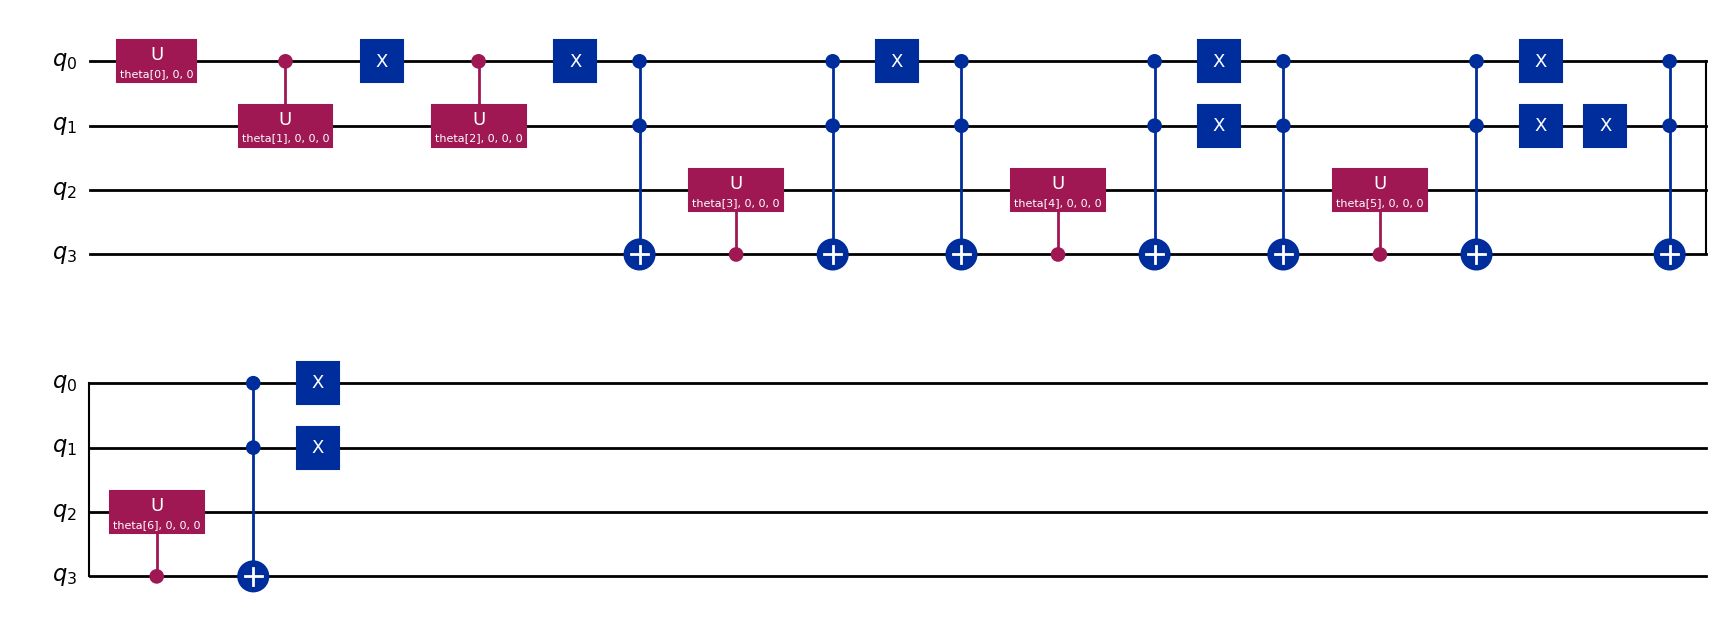

In [27]:
from qiskit.circuit import ParameterVector
qc=QuantumCircuit(4)
U_circuit(qc,ParameterVector('theta', length=7)).draw('mpl')

In [ ]:
%%capture
%pip install qiskit-aer
from qiskit_aer import AerSimulator

In [14]:
# @title QSVM, 2^0+2^1+...+2^{N-1} features
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


N=3
num_data_points=200
test_size=0.2

zeros_string = '0' * N
Num_shots=1024

num_components=0
for i in range(N):
  num_components+=2**i

df_sampled = combined_data.sample(n=num_data_points, random_state=42)

# Extract features and labels
X = df_sampled.drop('Cluster', axis=1)  # Assuming 'Cluster' is the target variable
y = df_sampled['Cluster']
#Minmax transform
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#PCA transform
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

num_clusters=2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(df_pca)

centroids = kmeans.cluster_centers_

# Print centroid 0 and centroid 1
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Add the cluster labels to the DataFramez
df_pca['Cluster'] = labels

A = df_pca.drop('Cluster', axis=1)  # Assuming 'Cluster' is the target variable
B = df_pca['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=test_size, random_state=42)

def func():
# Evaluate the trained model on the test set
    predicted_labels = []
    for i in range(len(X_test)):
        x = X_test.iloc[i].values
        qc1 = qiskit.QuantumCircuit(N+1,N)
        qc1 = U_circuit(qc1,x)
        qc1 = U_circuit_rev(qc1,centroid_0)
        qc1.measure([0,1,2],[0,1,2])
        #Noise
        sim_noise = AerSimulator(noise_model=noise_model)
        circ_tnoise = transpile(qc1, sim_noise)
        result1 = sim_noise.run(circ_tnoise).result()
        p0_qc1 = result1.get_counts(0).get(zeros_string, 0) / Num_shots
        #2nd Part
        qc2 = qiskit.QuantumCircuit(N+1,N)
        qc2 = U_circuit(qc2,x)
        qc2 = U_circuit_rev(qc2,centroid_1)
        qc2.measure([0,1,2],[0,1,2])
        #Noise
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(qc2, sim_noise)
        # Run and get counts
        result2 = sim_noise.run(circ_tnoise).result()
        p0_qc2 = result2.get_counts(0).get(zeros_string, 0) / Num_shots
        if p0_qc1>p0_qc2:
            predicted_labels.append(0)
        else: 
            predicted_labels.append(1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    return accuracy


In [16]:
def func():
# Evaluate the trained model on the test set
    predicted_labels = []
    for i in range(len(X_test)):
        x = X_test.iloc[i].values
        qc1 = qiskit.QuantumCircuit(N+1,N)
        qc1 = U_circuit(qc1,x)
        qc1 = U_circuit_rev(qc1,centroid_0)
        qc1.measure([0,1,2],[0,1,2])
        #Noise
        sim_noise = AerSimulator(noise_model=noise_model)
        circ_tnoise = transpile(qc1, sim_noise)
        result1 = sim_noise.run(circ_tnoise).result()
        p0_qc1 = result1.get_counts(0).get(zeros_string, 0) / Num_shots
        #2nd Part
        qc2 = qiskit.QuantumCircuit(N+1,N)
        qc2 = U_circuit(qc2,x)
        qc2 = U_circuit_rev(qc2,centroid_1)
        qc2.measure([0,1,2],[0,1,2])
        #Noise
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(qc2, sim_noise)
        # Run and get counts
        result2 = sim_noise.run(circ_tnoise).result()
        p0_qc2 = result2.get_counts(0).get(zeros_string, 0) / Num_shots
        if p0_qc1>p0_qc2:
            predicted_labels.append(0)
        else: 
            predicted_labels.append(1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    return accuracy

from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error,phase_damping_error,amplitude_damping_error)

def noise_bit_flip_error(p):
    error_gate = pauli_error([('X', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])
    return noise_model
def noise_measure_error(p):
    error_meas = pauli_error([('X', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    return noise_model
def noise_phase_flip_error(p):
    error_phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_phase_flip, ["u1", "u2", "u3"])
    return noise_model

def noise_cx_error(p):
    error_gate = pauli_error([('X', p), ('I', 1 - p)])
    error_cx = error_gate.tensor(error_gate)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_cx, "cx")
    return noise_model

def noise_phase_damping_error(p):
    error_gate=phase_damping_error(p)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,["u1", "u2", "u3"])
    return noise_model

def noise_amplitude_damping_error(p):
    error_gate=amplitude_damping_error(p)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,["u1", "u2", "u3"])
    return noise_model


def noise_depolarizing_error(p):
    error_gate=depolarizing_error(p,4)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,"dp")
    return noise_model

In [24]:
from tqdm import tqdm
# Generate a range of noise levels
p_values = np.linspace(0, 1, 22)

# Initialize a dictionary to store results
results = {
    "bit_flip_error": [],
    "measure_error": [],
    "phase_flip_error": [],
    "depolarizing_error": [],
    "phase_damping_error":[],
    "amplitude_damping_error":[]
}

# Collect results for gate errors

for p in tqdm(p_values):
    noise_model = noise_bit_flip_error(p)
    results["bit_flip_error"].append(func())
    
    noise_model = noise_measure_error(p)
    results["measure_error"].append(func())

    noise_model = noise_phase_flip_error(p)
    results["phase_flip_error"].append(func())

    noise_model= noise_depolarizing_error(p)
    results["depolarizing_error"].append(func())

    noise_model= noise_phase_damping_error(p)
    results["phase_damping_error"].append(func())

    noise_model= noise_amplitude_damping_error(p)
    results["amplitude_damping_error"].append(func())


  0%|          | 0/22 [00:00<?, ?it/s]

 50%|█████     | 11/22 [22:57<22:39, 123.57s/it]c:\Users\jeeth\Desktop\QML_LLM_Healthcare_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 86%|████████▋ | 19/22 [38:07<05:53, 117.97s/it]c:\Users\jeeth\Desktop\QML_LLM_Healthcare_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
 91%|█████████ | 20/22 [39:41<03:41, 110.60s/it]c:\Users\jeeth\Desktop\QML_LLM_Healthcare_Project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and be

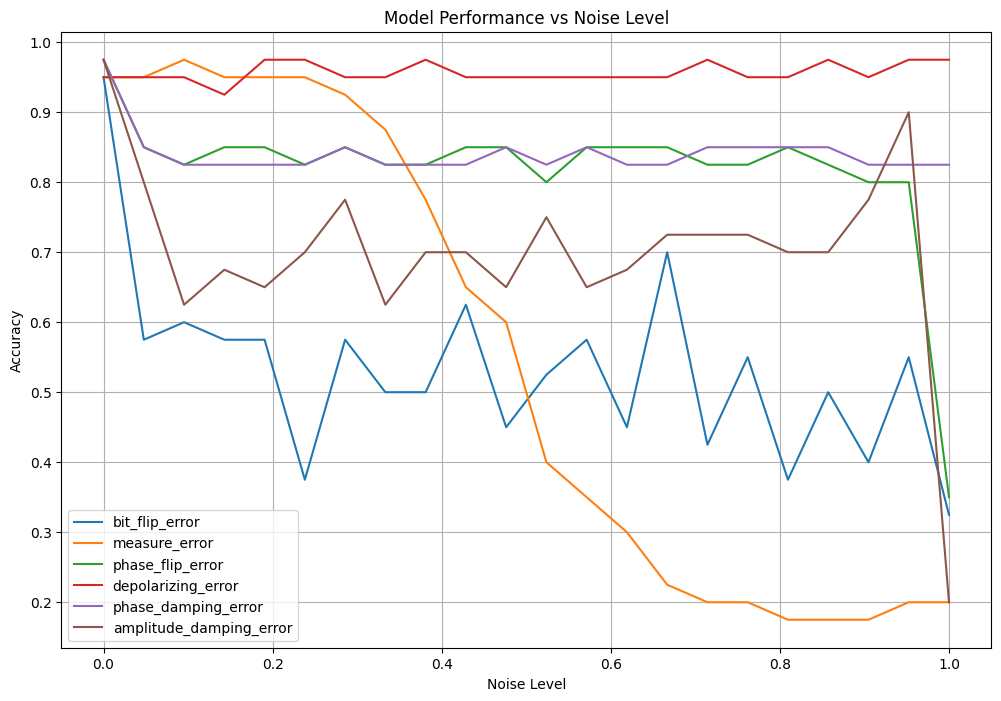

In [25]:
plt.figure(figsize=(12, 8))
for i in results.keys():
    plt.plot(p_values, results[i], label=i)
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Noise Level')
plt.legend()
plt.grid(True)
plt.show()

## HealthCare


In [5]:
import pandas as pd
import numpy as np
from tensorflow import keras
#Hyperparameter
max_length=51
import pandas as pd
df = pd.read_csv('medquad.csv', usecols=['question', 'focus_area'])
arr=df.to_numpy()
# Label count and index
label_count={}
for i in arr:
  label_count[i[-1]]=label_count.get(i[-1],0)+1
labels_count=sorted(label_count.items(),key=lambda x:-x[1])
label_index={i[0]:j for j,i in enumerate(labels_count)}
#Word count and index
word_counts={}
for i in arr:
  for j in i[0].split():
    word_counts[j]=word_counts.get(j,0)+1
word_counts=sorted(word_counts.items(),key=lambda x:-x[1])
word_index={i[0]:j+1 for j,i in enumerate(word_counts)}
word_index['PAD']=0
word_index=dict(sorted(word_index.items(),key=lambda x:x[1]))
#Tokenization
def tokenization(words):
  token=[]
  for i in words:
    k=[]
    for j in i.split():
      k.append(word_index[j])
    token.append(k)
  return token
# Tokenizing the data
tokenized_data=tokenization([i[0] for i in arr])
labels=[label_index[i[1]] for i in arr]
#Padding the data
data= keras.preprocessing.sequence.pad_sequences(tokenized_data,maxlen=max_length,padding="post")
#Only selecting two labels
new_data,label=[],[]
for i,j in zip(data,labels):
  if j<2:
    new_data.append(i)
    label.append(j)
combined_data=pd.DataFrame(np.c_[new_data,label])
h_data=new_data
h_label= label

In [8]:
# @title UUDagger circuit
def U_circuit(qc,theta):
  qc.u(theta[0],0,0,0)
  qc.cu(theta[1],0,0,0,0,1)
  qc.x(0)
  qc.cu(theta[2],0,0,0,0,1)
  qc.x(0)

  qc.mcx([0, 1], 3)
  qc.cu(theta[3],0,0,0,3,2)
  qc.mcx([0, 1], 3)

  qc.x(0)
  qc.mcx([0, 1], 3)
  qc.cu(theta[4],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)

  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(theta[5],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(1)

  qc.x(0)
  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(theta[6],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)
  qc.x(1)
  return qc

def U_circuit_rev(qc,theta):
  qc.x(0)
  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(-theta[6],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)
  qc.x(1)

  qc.x(1)
  qc.mcx([0, 1], 3)
  qc.cu(-theta[5],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(1)

  qc.x(0)
  qc.mcx([0, 1], 3)
  qc.cu(-theta[4],0,0,0,3,2)
  qc.mcx([0, 1], 3)
  qc.x(0)

  qc.mcx([0, 1], 3)
  qc.cu(-theta[3],0,0,0,3,2)
  qc.mcx([0, 1], 3)

  qc.x(0)
  qc.cu(-theta[2],0,0,0,0,1)
  qc.x(0)

  qc.cu(-theta[1],0,0,0,0,1)

  qc.u(-theta[0],0,0,0)

  return qc

In [9]:
%%capture
%pip install qiskit-aer
from qiskit_aer import AerSimulator

In [31]:
combined_data.columns = list(combined_data.columns)[:-1] + ['Cluster']
combined_data.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,Cluster
0,2,5,6,117,33,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44,5,42,43,7,117,101,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,3,4,10,8,117,33,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,3,4,11,7,117,33,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,3,4,11,7,117,33,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# @title QSVM, 2^0+2^1+...+2^{N-1} features
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


N=3
num_data_points=96
test_size=0.2

zeros_string = '0' * N
Num_shots=1024

num_components=0
for i in range(N):
  num_components+=2**i

df_sampled = combined_data.sample(n=num_data_points, random_state=42)

# Extract features and labels
X = df_sampled.drop('Cluster', axis=1)  # Assuming 'Cluster' is the target variable
y = df_sampled['Cluster']
#Minmax transform
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
#PCA transform
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

num_clusters=2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(df_pca)

centroids = kmeans.cluster_centers_

# Print centroid 0 and centroid 1
centroid_0 = centroids[0]
centroid_1 = centroids[1]

# Add the cluster labels to the DataFramez
df_pca['Cluster'] = labels

A = df_pca.drop('Cluster', axis=1)  # Assuming 'Cluster' is the target variable
B = df_pca['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(A, B, test_size=test_size, random_state=42)


KeyError: "['Cluster'] not found in axis"

In [25]:
def func():
# Evaluate the trained model on the test set
    predicted_labels = []
    for i in range(len(X_test)):
        x = X_test.iloc[i].values
        qc1 = qiskit.QuantumCircuit(N+1,N)
        qc1 = U_circuit(qc1,x)
        qc1 = U_circuit_rev(qc1,centroid_0)
        qc1.measure([0,1,2],[0,1,2])
        #Noise
        sim_noise = AerSimulator(noise_model=noise_model)
        circ_tnoise = transpile(qc1, sim_noise)
        result1 = sim_noise.run(circ_tnoise).result()
        p0_qc1 = result1.get_counts(0).get(zeros_string, 0) / Num_shots
        #2nd Part
        qc2 = qiskit.QuantumCircuit(N+1,N)
        qc2 = U_circuit(qc2,x)
        qc2 = U_circuit_rev(qc2,centroid_1)
        qc2.measure([0,1,2],[0,1,2])
        #Noise
        # Transpile circuit for noisy basis gates
        circ_tnoise = transpile(qc2, sim_noise)
        # Run and get counts
        result2 = sim_noise.run(circ_tnoise).result()
        p0_qc2 = result2.get_counts(0).get(zeros_string, 0) / Num_shots
        if p0_qc1>p0_qc2:
            predicted_labels.append(0)
        else: 
            predicted_labels.append(1)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)

    return accuracy
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error,phase_damping_error,amplitude_damping_error)

def noise_bit_flip_error(p):
    error_gate = pauli_error([('X', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])
    return noise_model
def noise_measure_error(p):
    error_meas = pauli_error([('X', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    return noise_model
def noise_phase_flip_error(p):
    error_phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_phase_flip, ["u1", "u2", "u3"])
    return noise_model

def noise_cx_error(p):
    error_gate = pauli_error([('X', p), ('I', 1 - p)])
    error_cx = error_gate.tensor(error_gate)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_cx, "cx")
    return noise_model

def noise_phase_damping_error(p):
    error_gate=phase_damping_error(p)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,["u1", "u2", "u3"])
    return noise_model

def noise_amplitude_damping_error(p):
    error_gate=amplitude_damping_error(p)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,["u1", "u2", "u3"])
    return noise_model


def noise_depolarizing_error(p):
    error_gate=depolarizing_error(p,4)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,"dp")
    return noise_model

In [34]:
from tqdm import tqdm
import qiskit
# Generate a range of noise levels
p_values = np.linspace(0, 1, 22)

# Initialize a dictionary to store results
results = {
    "bit_flip_error": [],
    "measure_error": [],
    "phase_flip_error": [],
    "depolarizing_error": [],
    "phase_damping_error":[],
    "amplitude_damping_error":[]
}

# Collect results for gate errors

for p in tqdm(p_values):
    noise_model = noise_bit_flip_error(p)
    results["bit_flip_error"].append(func())
    
    noise_model = noise_measure_error(p)
    results["measure_error"].append(func())

    noise_model = noise_phase_flip_error(p)
    results["phase_flip_error"].append(func())

    noise_model= noise_depolarizing_error(p)
    results["depolarizing_error"].append(func())

    noise_model= noise_phase_damping_error(p)
    results["phase_damping_error"].append(func())

    noise_model= noise_amplitude_damping_error(p)
    results["amplitude_damping_error"].append(func())

    
# Collect results for CNOT errors
# for p in p_values:
#     noise_model = noise_cx_error(p)
#     results["cx_error"].append(func())

100%|██████████| 22/22 [21:32<00:00, 58.75s/it]


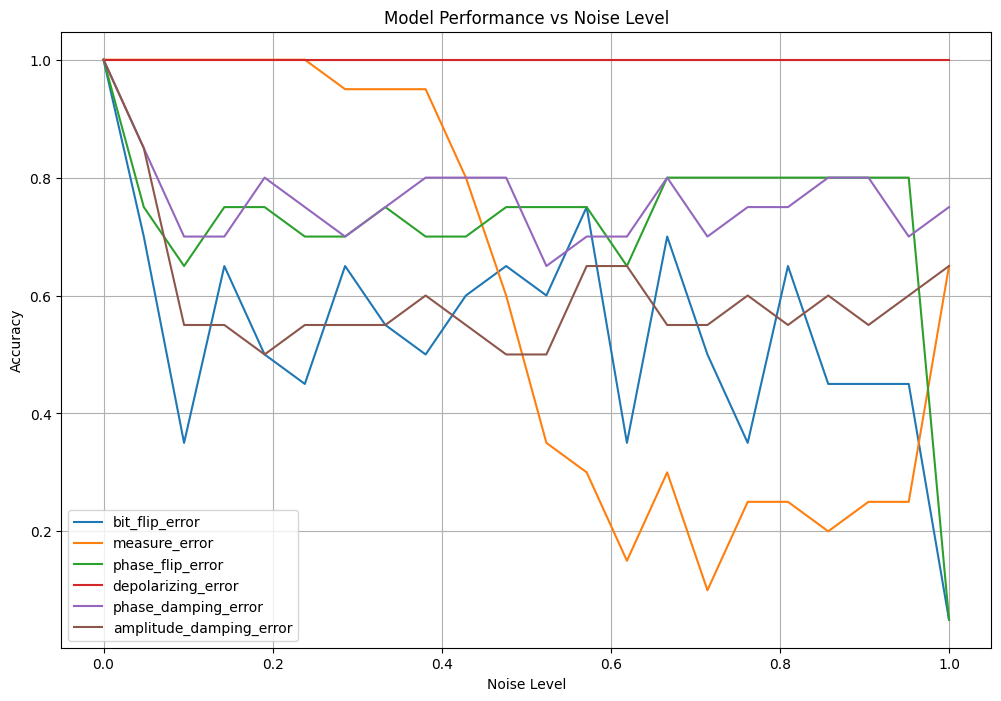

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i in results.keys():
    plt.plot(p_values, results[i], label=i)
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Noise Level')
plt.legend()
plt.grid(True)
plt.show()

## Metrics

SVC

In [12]:
from sklearn.svm import SVC

In [13]:
model= SVC(gamma='auto')
accuracy_score, precision_score, recall_score, f1_score

In [22]:
def metrics_evaluator(model,m_data,m_labels):
    model.fit(m_data,m_labels)
    model.score(m_data,m_labels)
    m_predict= model.predict(m_data)
    print(f"accuracy_score:{accuracy_score(m_labels,m_predict)}")
    print(f"precision_score:{accuracy_score(m_labels,m_predict)}")
    print(f"recall_score:{recall_score(m_labels,m_predict)}")
    print(f"f1_score:{f1_score(m_labels,m_predict)}")

In [23]:
metrics_evaluator(model,m_data,m_labels)

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


In [25]:
svc_model1= SVC(gamma='auto')
metrics_evaluator(svc_model1,h_data,h_label)

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


RF

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf=RandomForestClassifier()
metrics_evaluator(rf,m_data,m_labels)

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


In [35]:
rf= RandomForestClassifier()
metrics_evaluator(rf,h_data,h_label)

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [43]:
k_model= KNeighborsClassifier(n_neighbors=2)
scaler=StandardScaler()
m_data_scale=scaler.fit_transform(m_data)
metrics_evaluator(k_model,m_data_scale,m_labels)

accuracy_score:0.815
precision_score:0.815
recall_score:0.6105263157894737
f1_score:0.7581699346405228


In [44]:
scaler=StandardScaler()
h_data_scale=scaler.fit_transform(h_data)
k_model= KNeighborsClassifier(n_neighbors=2)
metrics_evaluator(k_model,h_data_scale,h_label)

accuracy_score:0.9479166666666666
precision_score:0.9479166666666666
recall_score:0.8837209302325582
f1_score:0.9382716049382716


LR

In [50]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
metrics_evaluator(lr,m_data_scale,m_labels)

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


In [49]:
from sklearn.linear_model import LinearRegression
lr= LogisticRegression()
metrics_evaluator(lr,h_data_scale,h_label)

accuracy_score:0.6354166666666666
precision_score:0.6354166666666666
recall_score:0.3023255813953488
f1_score:0.4262295081967213


# NN

In [51]:
import torch
import torch.nn as nn

In [205]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed= nn.Embedding(vocab_size,16)

        self.linear = nn.Linear(256*16,4)
        self.sigmoid =nn.Sigmoid()
        self.linear1= nn.Linear(4,1)

    def forward(self,x):

        x=self.embed(x)
        x=self.sigmoid(self.linear(x.view(-1,16*256)))

        return self.sigmoid(self.linear1(x)).view(-1)
        
        

In [53]:
m_data_tensor= torch.tensor(m_data)
m_data_labels= torch.tensor(m_labels,dtype=torch.float32)
model=NN()
epoch=1000
loss_fn= torch.nn.BCELoss()
optim= torch.optim.Adam(model.parameters())
lossi=[]
acci=[]
for i in range(epoch):
    output= model(m_data_tensor)
    loss= loss_fn(output,m_data_labels)
    acc=  sum((output >0.5).int() == m_data_labels) /m_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    

In [55]:
m_predict=(output >0.5).int()
print(f"accuracy_score:{accuracy_score(m_labels,m_predict)}")
print(f"precision_score:{accuracy_score(m_labels,m_predict)}")
print(f"recall_score:{recall_score(m_labels,m_predict)}")
print(f"f1_score:{f1_score(m_labels,m_predict)}")

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


In [58]:
vocab_size_h=118
class NN1(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed= nn.Embedding(vocab_size_h,16)

        self.linear = nn.Linear(max_length*16,16)

        self.sigmoid =nn.Sigmoid()
        self.linear1= nn.Linear(16,4)
        self.linear2=nn.Linear(4,1)

    def forward(self,x):

        x=self.embed(x)
        x=self.sigmoid(self.linear(x.view(-1,16*max_length)))
        x= self.sigmoid(self.linear1(x))
        return self.sigmoid(self.linear2(x)).view(-1)
        
        

In [59]:
h_data_tensor= torch.tensor(h_data)
h_data_labels= torch.tensor(h_label,dtype=torch.float32)
model=NN1()
epoch=100
loss_fn= torch.nn.BCELoss()
optim= torch.optim.SGD(model.parameters(),lr=0.1)
lossi=[]
acci=[]
for i in range(epoch):
    output= model(h_data_tensor)
    loss= loss_fn(output,h_data_labels)
    acc=  sum((output >0.5).int() == h_data_labels) /h_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    if i%(epoch/10) ==0 :
        print(f"Epoch,{i}={acc}")

Epoch,0=0.5520833134651184
Epoch,10=0.5520833134651184
Epoch,20=0.5520833134651184
Epoch,30=0.5520833134651184
Epoch,40=0.5520833134651184
Epoch,50=0.9583333134651184
Epoch,60=1.0
Epoch,70=1.0
Epoch,80=1.0
Epoch,90=1.0


In [60]:
m_predict=(output >0.5).int()
print(f"accuracy_score:{accuracy_score(h_label,m_predict)}")
print(f"precision_score:{accuracy_score(h_label,m_predict)}")
print(f"recall_score:{recall_score(h_label,m_predict)}")
print(f"f1_score:{f1_score(h_label,m_predict)}")

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


# CNN

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Embedding layer
        self.embed = nn.Embedding(vocab_size, 16)

        # Convolutional layer
        self.conv1 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(32 * 256, 4)  # Adjust the dimensions according to the output of conv1
        self.fc2 = nn.Linear(4, 1)

        # Activation functions
        self.sigmoid = nn.Sigmoid()

        self.batchnorm1 = nn.BatchNorm1d(32*256)
        self.batchnorm2 = nn.BatchNorm1d(4)


    def forward(self, x):
        # Apply embedding
        x = self.embed(x)  # Output shape: [batch_size, 256, 16]

        # Transpose to match Conv1d input shape: [batch_size, channels, sequence_length]
        x = x.transpose(1, 2)  # Output shape: [batch_size, 16, 256]

        # Apply convolutional layer with ReLU activation and max pooling
        x = F.relu(self.conv1(x))  # Output shape: [batch_size, 32, 256]
        # Flatten the output from the convolutional layer
        x = x.view(x.size(0), -1)  # Output shape: [batch_size, 32*256]
        x = self.batchnorm1(x)

        # Apply fully connected layers with activation functions
        x = self.sigmoid(self.fc1(x))  # Output shape: [batch_size, 4]
        x = self.batchnorm2(x)
        x = self.sigmoid(self.fc2(x))  # Output shape: [batch_size, 1]

        return x.view(-1)

In [66]:
m_data_tensor= torch.tensor(m_data)
m_data_labels= torch.tensor(m_labels,dtype=torch.float32)
model=CNN()
epoch=100
loss_fn= torch.nn.BCELoss()
optim= torch.optim.Adam(model.parameters())
lossi=[]
acci=[]
from tqdm import tqdm
for i in tqdm(range(epoch)):
    output= model(m_data_tensor)
    loss= loss_fn(output,m_data_labels)
    acc=  sum((output >0.5).int() == m_data_labels) /m_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    if(i%(epoch/10)==0):
        print(acc.item())
    if acc==1.0:
        break

  0%|          | 0/100 [00:00<?, ?it/s]

  3%|▎         | 3/100 [00:00<00:08, 11.84it/s]

0.4699999988079071


 11%|█         | 11/100 [00:00<00:08, 10.34it/s]

0.9549999833106995


 21%|██        | 21/100 [00:01<00:07, 11.20it/s]

0.9950000047683716


In [68]:
m_predict=(output >0.5).int()
print(f"accuracy_score:{accuracy_score(m_labels,m_predict)}")
print(f"precision_score:{accuracy_score(m_labels,m_predict)}")
print(f"recall_score:{recall_score(m_labels,m_predict)}")
print(f"f1_score:{f1_score(m_labels,m_predict)}")

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


tensor(1.)


([<matplotlib.lines.Line2D at 0x1a04b3146b0>],
 [<matplotlib.lines.Line2D at 0x1a04b3148f0>])

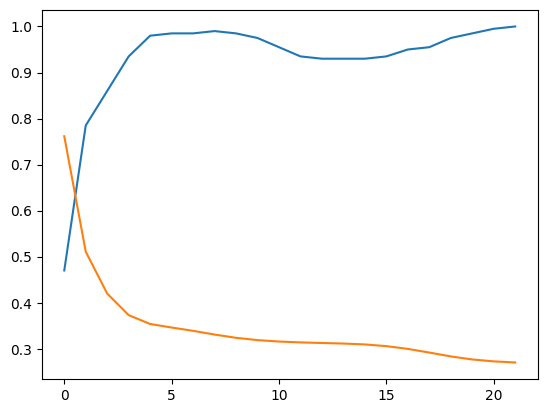

In [67]:

import matplotlib.pyplot as plt
plt.plot(acci),plt.plot(lossi)

(array([  1.,   9.,  11.,  48., 203., 297., 217.,  10.,   3.,   1.]),
 array([-208.17498779, -167.54084778, -126.90670776,  -86.27256012,
         -45.6384201 ,   -5.00428009,   35.62985992,   76.26399994,
         116.89814758,  157.5322876 ,  198.16642761]),
 <BarContainer object of 10 artists>)

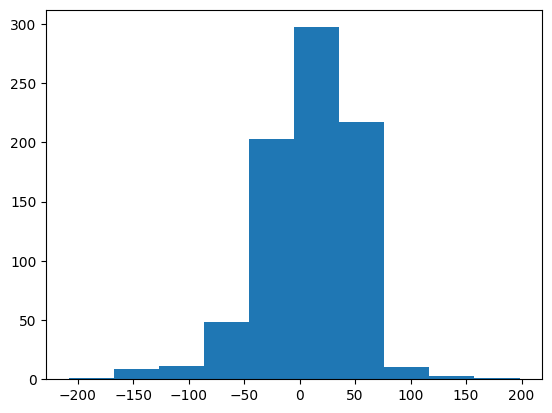

In [47]:
# Error Checking
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.conv1.register_forward_hook(get_activation('conv1'))
model.fc1.register_forward_hook(get_activation('fc1'))
model.fc2.register_forward_hook(get_activation('fc2'))


In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F

vocab_size_h=118
max_length=51
class CNN1(nn.Module):
    def __init__(self):
        super().__init__()

        # Embedding layer
        self.embed = nn.Embedding(vocab_size_h, 16)

        # Convolutional layer
        self.conv1 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, padding=1)

        # Fully connected layers
        self.fc1 = nn.Linear(32 *max_length, 4)  # Adjust the dimensions according to the output of conv1
        self.fc2 = nn.Linear(4, 1)

        # Activation functions
        self.sigmoid = nn.Sigmoid()

        self.batchnorm1 = nn.BatchNorm1d(32*max_length)
        self.batchnorm2 = nn.BatchNorm1d(4)


    def forward(self, x):
        # Apply embedding
        x = self.embed(x)  # Output shape: [batch_size, 51, 16]

        # Transpose to match Conv1d input shape: [batch_size, channels, sequence_length]
        x = x.transpose(1, 2)  # Output shape: [batch_size, 16, 51]

        # Apply convolutional layer with ReLU activation and max pooling
        x = F.relu(self.conv1(x))  # Output shape: [batch_size, 32,51]
        # Flatten the output from the convolutional layer
        x = x.view(x.size(0), -1)  # Output shape: [batch_size, 32*51]
        x = self.batchnorm1(x)

        # Apply fully connected layers with activation functions
        x = self.sigmoid(self.fc1(x))  # Output shape: [batch_size, 4]
        x = self.batchnorm2(x)
        x = self.sigmoid(self.fc2(x))  # Output shape: [batch_size, 1]

        return x.view(-1)

In [70]:
h_data_tensor= torch.tensor(h_data)
h_data_labels= torch.tensor(h_label,dtype=torch.float32)
model=CNN1()
loss_fn= torch.nn.BCELoss()
optim= torch.optim.SGD(model.parameters(),lr=0.1)
lossi=[]
acci=[]
for i in range(epoch):
    output= model(h_data_tensor)
    loss= loss_fn(output,h_data_labels)
    acc=  sum((output >0.5).int() == h_data_labels) /h_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    if i%(epoch/10) ==0 :
        print(f"Epoch,{i}={acc}")

Epoch,0=0.5208333134651184
Epoch,10=1.0
Epoch,20=1.0
Epoch,30=1.0
Epoch,40=1.0
Epoch,50=1.0
Epoch,60=1.0
Epoch,70=1.0
Epoch,80=1.0
Epoch,90=1.0


In [72]:
m_predict=(output >0.5).int()
print(f"accuracy_score:{accuracy_score(h_label,m_predict)}")
print(f"precision_score:{accuracy_score(h_label,m_predict)}")
print(f"recall_score:{recall_score(h_label,m_predict)}")
print(f"f1_score:{f1_score(h_label,m_predict)}")

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


# QNN


In [1]:
import torch
import torch.nn as nn
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS

from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit_machine_learning.connectors import TorchConnector


In [9]:
%%capture
%pip install qiskit-aer
from qiskit_aer import AerSimulator

## Non-Noisy Models

### Movie reviews


In [10]:
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()


class NN(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed= nn.Embedding(vocab_size,16)

        self.linear = nn.Linear(256*16,4)
        self.linear1 = nn.Linear(4,2)
        self.qnn = TorchConnector(qnn4)
        self.sigmoid =nn.Sigmoid()
        self.linear2= nn.Linear(1,1)

    def forward(self,x):

        x=self.embed(x)
        x=self.sigmoid(self.linear1(self.linear(x.view(-1,16*256))))
        return self.sigmoid(self.qnn(x)).view(-1)

        # return self.sigmoid(self.linear2(x)).view(-1)
        

In [11]:
m_data_tensor= torch.tensor(m_data)
m_data_labels= torch.tensor(m_labels,dtype=torch.float32)
model=NN()
epoch= 200
loss_fn= torch.nn.BCELoss()
optim= torch.optim.Adadelta(model.parameters(),
                           lr=0.01,
                           weight_decay=0.8)

lossi=[]
acci=[]

for i in range(epoch):
    output= model(m_data_tensor)
    loss= loss_fn(output,m_data_labels)
    acc=  sum((output >0.5).int() == m_data_labels) /m_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    print(f"Epoch,{i}={acc}")
    if acc==1.0:
        break

Epoch,0=0.4449999928474426
Epoch,1=0.4399999976158142
Epoch,2=0.44999998807907104
Epoch,3=0.49000000953674316
Epoch,4=0.5249999761581421
Epoch,5=0.5
Epoch,6=0.5099999904632568
Epoch,7=0.5299999713897705
Epoch,8=0.5950000286102295
Epoch,9=0.6050000190734863
Epoch,10=0.6449999809265137
Epoch,11=0.6600000262260437
Epoch,12=0.6499999761581421
Epoch,13=0.6499999761581421
Epoch,14=0.6600000262260437
Epoch,15=0.6650000214576721
Epoch,16=0.6800000071525574
Epoch,17=0.6949999928474426
Epoch,18=0.7200000286102295
Epoch,19=0.7350000143051147
Epoch,20=0.7649999856948853
Epoch,21=0.7799999713897705
Epoch,22=0.800000011920929
Epoch,23=0.8299999833106995
Epoch,24=0.8600000143051147
Epoch,25=0.8700000047683716
Epoch,26=0.875
Epoch,27=0.8949999809265137
Epoch,28=0.9049999713897705
Epoch,29=0.9100000262260437
Epoch,30=0.9300000071525574
Epoch,31=0.9300000071525574
Epoch,32=0.9399999976158142
Epoch,33=0.949999988079071
Epoch,34=0.9649999737739563
Epoch,35=0.9649999737739563
Epoch,36=0.9549999833106995
Ep

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def metrics_evaluator(model,m_data,m_labels):
    m_predict=model(m_data)
    m_predict=m_predict.detach()
    m_predict=(m_predict.detach()>0.5).int()
    print(f"accuracy_score:{accuracy_score(m_labels,m_predict)}")
    print(f"precision_score:{accuracy_score(m_labels,m_predict)}")
    print(f"recall_score:{recall_score(m_labels,m_predict)}")
    print(f"f1_score:{f1_score(m_labels,m_predict)}")
metrics_evaluator(model,m_data_tensor,m_data_labels)

accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


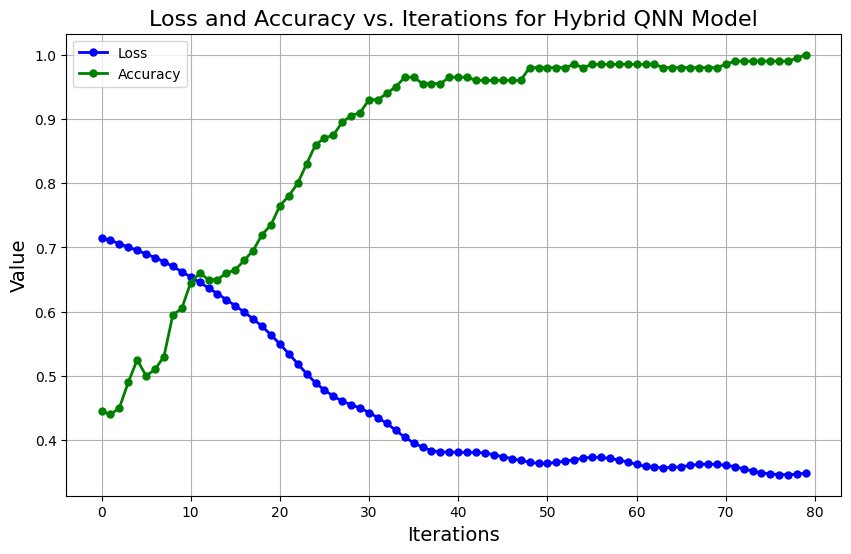

In [13]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(lossi, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Loss')

# Plot accuracy on the same figure
plt.plot(acci, color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Accuracy')

# Add labels and title
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Loss and Accuracy vs. Iterations for Hybrid QNN Model', fontsize=16)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


In [ ]:
# max healthcare acc acheived= 822916 

### Healthcare

In [10]:
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()

vocab_size_h=118
class NN(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed= nn.Embedding(vocab_size_h,16)

        self.linear = nn.Linear(51*16,4)
        self.linear1 = nn.Linear(4,2)
        self.qnn = TorchConnector(qnn4)
        self.sigmoid =nn.Sigmoid()
        self.linear2= nn.Linear(1,1)

    def forward(self,x):

        x=self.embed(x)
        x=self.sigmoid(self.linear1(self.linear(x.view(-1,16*51))))
        return self.sigmoid(self.qnn(x)).view(-1)

        # return self.sigmoid(self.linear2(x)).view(-1)
        
        

In [11]:
h_data_tensor= torch.tensor(h_data)
h_data_labels= torch.tensor(h_label,dtype=torch.float32)
model=NN()
epoch= 200
loss_fn= torch.nn.BCELoss()
optim= torch.optim.Adadelta(model.parameters(),lr=0.05,weight_decay=0.8)

lossi=[]
acci=[]

for i in range(epoch):
    output= model(h_data_tensor)
    loss= loss_fn(output,h_data_labels)
    acc=  sum((output >0.5).int() == h_data_labels) /h_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    print(f"Epoch:{i}={acc}")

C:\Users\Admin\AppData\Local\Temp\ipykernel_98124\2924959120.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  h_data_tensor= torch.tensor(h_data)


Epoch:0=0.5520833134651184
Epoch:1=0.5520833134651184
Epoch:2=0.5520833134651184
Epoch:3=0.5520833134651184
Epoch:4=0.5520833134651184
Epoch:5=0.5520833134651184
Epoch:6=0.5520833134651184
Epoch:7=0.5520833134651184
Epoch:8=0.5520833134651184
Epoch:9=0.5520833134651184
Epoch:10=0.5520833134651184
Epoch:11=0.5520833134651184
Epoch:12=0.5520833134651184
Epoch:13=0.5520833134651184
Epoch:14=0.5520833134651184
Epoch:15=0.5520833134651184
Epoch:16=0.5520833134651184
Epoch:17=0.5520833134651184
Epoch:18=0.5520833134651184
Epoch:19=0.6458333134651184
Epoch:20=0.65625
Epoch:21=0.7604166865348816
Epoch:22=0.8541666865348816
Epoch:23=0.8645833134651184
Epoch:24=0.7604166865348816
Epoch:25=0.7604166865348816
Epoch:26=0.8958333134651184
Epoch:27=0.9479166865348816
Epoch:28=0.96875
Epoch:29=0.96875
Epoch:30=0.96875
Epoch:31=0.96875
Epoch:32=0.96875
Epoch:33=0.96875
Epoch:34=0.96875
Epoch:35=0.96875
Epoch:36=0.96875
Epoch:37=0.96875
Epoch:38=0.96875
Epoch:39=1.0
Epoch:40=1.0
Epoch:41=1.0
Epoch:42=1.

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def metrics_evaluator(model,m_data,m_labels):
    m_predict=model(m_data)
    m_predict=m_predict.detach()
    m_predict=(m_predict.detach()>0.5).int()
    print(f"accuracy_score:{accuracy_score(m_labels,m_predict)}")
    print(f"precision_score:{accuracy_score(m_labels,m_predict)}")
    print(f"recall_score:{recall_score(m_labels,m_predict)}")
    print(f"f1_score:{f1_score(m_labels,m_predict)}")
metrics_evaluator(model,h_data_tensor,h_data_labels)


accuracy_score:1.0
precision_score:1.0
recall_score:1.0
f1_score:1.0


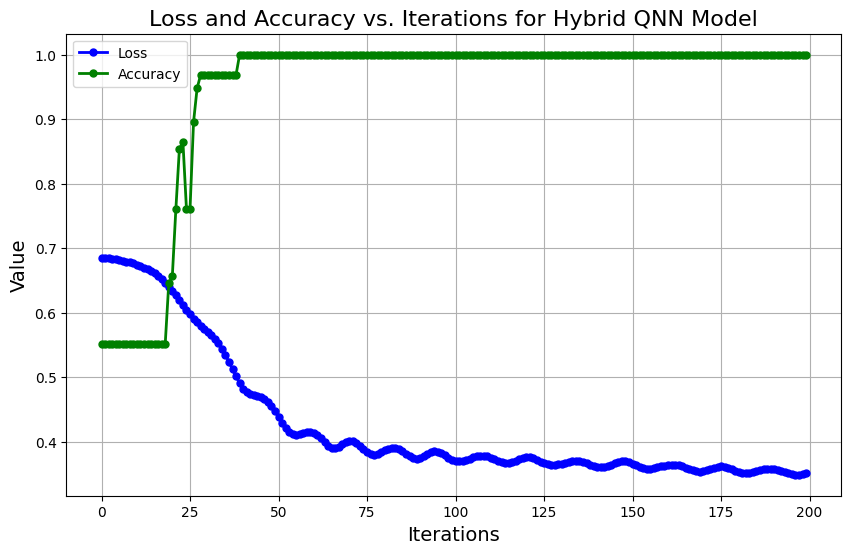

In [13]:
import matplotlib.pyplot as plt

# Create a figure
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(lossi, color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Loss')

# Plot accuracy on the same figure
plt.plot(acci, color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='Accuracy')

# Add labels and title
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Loss and Accuracy vs. Iterations for Hybrid QNN Model', fontsize=16)

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()


## Noisy Models

In [11]:
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error,phase_damping_error,amplitude_damping_error)

def noise_bit_flip_error(p):
    error_gate = pauli_error([('X', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate, ["u1", "u2", "u3"])
    return noise_model
def noise_measure_error(p):
    error_meas = pauli_error([('X', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure")
    return noise_model
def noise_phase_flip_error(p):
    error_phase_flip = pauli_error([('Z', p), ('I', 1 - p)])
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_phase_flip, ["u1", "u2", "u3"])
    return noise_model

def noise_cx_error(p):
    error_gate = pauli_error([('X', p), ('I', 1 - p)])
    error_cx = error_gate.tensor(error_gate)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_cx, "cx")
    return noise_model

def noise_phase_damping_error(p):
    error_gate=phase_damping_error(p)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,["u1", "u2", "u3"])
    return noise_model

def noise_amplitude_damping_error(p):
    error_gate=amplitude_damping_error(p)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,["u1", "u2", "u3"])
    return noise_model


def noise_depolarizing_error(p):
    error_gate=depolarizing_error(p,4)
    noise_model=NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_gate,"dp")
    return noise_model

### Movie Review

In [12]:
from qiskit_aer.primitives import Estimator as Estimator

def qnn_creator(noise_model=None):                   
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)
    if not (noise_model==None):
        noisy_estimator = Estimator(backend_options=dict(noise_model=noise_model))
        return  EstimatorQNN(
            circuit=qc,
            estimator= noisy_estimator,
            input_params=feature_map.parameters,
            weight_params=ansatz.parameters,
            input_gradients=True,
        )
    else: 
        return  EstimatorQNN(
            circuit=qc,
            input_params=feature_map.parameters,
            weight_params=ansatz.parameters,
            input_gradients=True,
        )
        
qnn= qnn_creator()

class NN(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed= nn.Embedding(vocab_size,16)

        self.linear = nn.Linear(256*16,4)
        self.linear1 = nn.Linear(4,2)
        self.qnn = TorchConnector(qnn)
        self.sigmoid =nn.Sigmoid()
        self.linear2= nn.Linear(1,1)

    def forward(self,x):

        x=self.embed(x)
        x=self.sigmoid(self.linear1(self.linear(x.view(-1,16*256))))
        return self.sigmoid(self.qnn(x)).view(-1)

        # return self.sigmoid(self.linear2(x)).view(-1)
    def forward1(self,x,noise_model):
          
        qnn_noisy=qnn_creator(noise_model)

        param=[x.detach().numpy() for x in self.parameters()][-3]

        with torch.no_grad():
            x=self.embed(x)
            x=self.sigmoid(self.linear1(self.linear(x.view(-1,16*256))))
            x=x.detach()
            x = qnn_noisy.forward(x,param)
            x = torch.tensor(x)
        return self.sigmoid(x).view(-1)
        

In [13]:
model=NN()
optim= torch.optim.Adadelta(model.parameters(),
                           lr=0.01,
                           weight_decay=0.8)


lossi=[]
acci=[]

In [15]:

m_data_tensor= torch.tensor(m_data)
m_data_labels= torch.tensor(m_labels,dtype=torch.float32)
epoch= 200

loss_fn= torch.nn.BCELoss()
for i in range(epoch):
    optim.zero_grad()
    output= model(m_data_tensor)
    loss= loss_fn(output,m_data_labels)
    acc=  sum((output >0.5).int() == m_data_labels) /m_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    if acc >= 0.88:
        break;
    optim.step()
    lossi.append(loss.detach().numpy())
    print(f"Epoch:{i} | Acc:{acc}")

Epoch:0 | Acc:0.5049999952316284
Epoch:1 | Acc:0.5099999904632568
Epoch:2 | Acc:0.5099999904632568
Epoch:3 | Acc:0.5149999856948853
Epoch:4 | Acc:0.5199999809265137
Epoch:5 | Acc:0.5199999809265137
Epoch:6 | Acc:0.5249999761581421
Epoch:7 | Acc:0.5299999713897705
Epoch:8 | Acc:0.550000011920929
Epoch:9 | Acc:0.5600000023841858
Epoch:10 | Acc:0.5699999928474426
Epoch:11 | Acc:0.5799999833106995
Epoch:12 | Acc:0.5849999785423279
Epoch:13 | Acc:0.5899999737739563
Epoch:14 | Acc:0.5950000286102295
Epoch:15 | Acc:0.6000000238418579
Epoch:16 | Acc:0.6000000238418579
Epoch:17 | Acc:0.6050000190734863
Epoch:18 | Acc:0.6100000143051147
Epoch:19 | Acc:0.6150000095367432
Epoch:20 | Acc:0.6150000095367432
Epoch:21 | Acc:0.6200000047683716
Epoch:22 | Acc:0.625
Epoch:23 | Acc:0.6299999952316284
Epoch:24 | Acc:0.6399999856948853
Epoch:25 | Acc:0.6399999856948853
Epoch:26 | Acc:0.6449999809265137
Epoch:27 | Acc:0.6499999761581421
Epoch:28 | Acc:0.6499999761581421
Epoch:29 | Acc:0.6549999713897705
Epoc

In [ ]:
from tqdm import tqdm
# Generate a range of noise levels
p_values = np.linspace(0, 1, 22)

# Initialize a dictionary to store results
results = {
    "bit_flip_error": [],
    "measure_error": [],
    "phase_flip_error": [],
    "depolarizing_error": [],
    "phase_damping_error":[],
    "amplitude_damping_error":[]
}

# Collect results for gate errors

for p in tqdm(p_values):
    noise_model = noise_bit_flip_error(p)
    results["bit_flip_error"].append(sum((model.forward1(m_data_tensor,noise_model) >0.5).int() == m_data_labels) /m_data_labels.shape[0])
    
    noise_model = noise_measure_error(p)
    results["measure_error"].append(sum((model.forward1(m_data_tensor,noise_model) >0.5).int() == m_data_labels) /m_data_labels.shape[0])

    noise_model = noise_phase_flip_error(p)
    results["phase_flip_error"].append(sum((model.forward1(m_data_tensor,noise_model) >0.5).int() == m_data_labels) /m_data_labels.shape[0])

    noise_model= noise_depolarizing_error(p)
    results["depolarizing_error"].append(sum((model.forward1(m_data_tensor,noise_model) >0.5).int() == m_data_labels) /m_data_labels.shape[0])

    noise_model= noise_phase_damping_error(p)
    results["phase_damping_error"].append(sum((model.forward1(m_data_tensor,noise_model) >0.5).int() == m_data_labels) /m_data_labels.shape[0])

    noise_model= noise_amplitude_damping_error(p)
    results["amplitude_damping_error"].append(sum((model.forward1(m_data_tensor,noise_model) >0.5).int() == m_data_labels) /m_data_labels.shape[0])

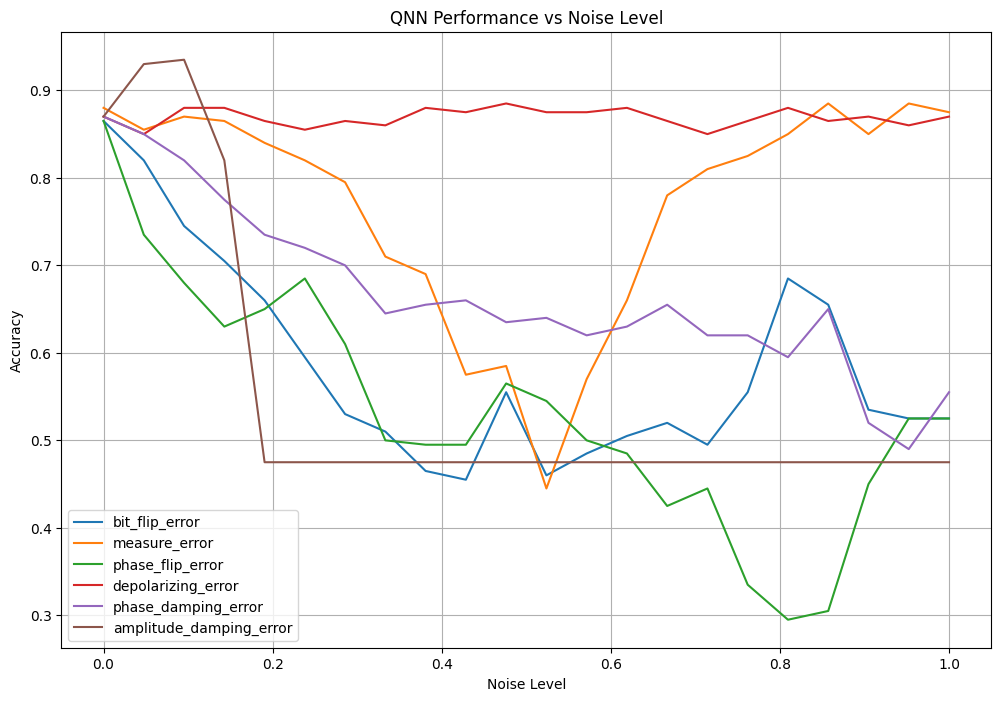

In [19]:
plt.figure(figsize=(12, 8))
for i in results.keys():
    plt.plot(p_values, results[i], label=i)
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.title('QNN Performance vs Noise Level')
plt.legend()
plt.grid(True)
plt.show()

### Healthcare

In [70]:
def create_qnn():
    feature_map = ZZFeatureMap(2)
    ansatz = RealAmplitudes(2, reps=1)
    qc = QuantumCircuit(2)
    qc.compose(feature_map, inplace=True)
    qc.compose(ansatz, inplace=True)

    # REMEMBER TO SET input_gradients=True FOR ENABLING HYBRID GRADIENT BACKPROP
    qnn = EstimatorQNN(
        circuit=qc,
        input_params=feature_map.parameters,
        weight_params=ansatz.parameters,
        input_gradients=True,
    )
    return qnn


qnn4 = create_qnn()

vocab_size_h=118
class NN(nn.Module):
    def __init__(self):
        super().__init__()

        self.embed= nn.Embedding(vocab_size_h,16)

        self.linear = nn.Linear(51*16,4)
        self.linear1 = nn.Linear(4,2)
        self.qnn = TorchConnector(qnn4)
        self.sigmoid =nn.Sigmoid()
        self.linear2= nn.Linear(1,1)

    def forward(self,x):

        x=self.embed(x)
        x=self.sigmoid(self.linear1(self.linear(x.view(-1,16*51))))
        return self.sigmoid(self.qnn(x)).view(-1)

        # return self.sigmoid(self.linear2(x)).view(-1)
        
    def forwad1(self,x,noise_model):
        feature_map = ZZFeatureMap(2)
        ansatz = RealAmplitudes(2, reps=1)
        qc = QuantumCircuit(2)
        qc.compose(feature_map, inplace=True)
        qc.compose(ansatz, inplace=True)

        noisy_estimator = Estimator(backend_options=dict(noise_model=noise_model))
        qnn_noisy=EstimatorQNN(
            circuit=qc,
            estimator= noisy_estimator,
            input_params=feature_map.parameters,
            weight_params=ansatz.parameters,
            input_gradients=True,
        )
        x=self.embed(x)
        x=self.sigmoid(self.linear1(self.linear(x.view(-1,16*51))))
                  
        qnn_noisy=qnn_creator(noise_model)
        param=[y.detach().numpy() for y in self.parameters()][-3]
        x= qnn_noisy.forward(x.detach().numpy() ,param )
        return self.sigmoid(torch.tensor(x)).view(-1)

In [72]:
h_data_tensor= torch.tensor(h_data)
h_data_labels= torch.tensor(h_label,dtype=torch.float32)
model=NN()
epoch=200
loss_fn= torch.nn.BCELoss()
optim= torch.optim.Adadelta(model.parameters(),lr=0.05,weight_decay=0.8)
lossi=[]
acci=[]

for i in range(epoch):
    output= model(h_data_tensor)
    loss= loss_fn(output,h_data_labels)
    acc=  sum((output >0.5).int() == h_data_labels) /h_data_labels.shape[0]
    acci.append(acc)
    loss.backward()
    optim.step()
    lossi.append(loss.detach().numpy())
    print(f"Epoch:{i}={acc}")
    if acc>0.9:
        break;

Epoch:0=0.5520833134651184
Epoch:1=0.5520833134651184
Epoch:2=0.5520833134651184
Epoch:3=0.6458333134651184
Epoch:4=0.5625
Epoch:5=0.5520833134651184
Epoch:6=0.4895833432674408
Epoch:7=0.5208333134651184
Epoch:8=0.5625
Epoch:9=0.6458333134651184
Epoch:10=0.5520833134651184
Epoch:11=0.5520833134651184
Epoch:12=0.5520833134651184
Epoch:13=0.5520833134651184
Epoch:14=0.6458333134651184
Epoch:15=0.6875
Epoch:16=0.8854166865348816
Epoch:17=0.6875
Epoch:18=0.5520833134651184
Epoch:19=0.5520833134651184
Epoch:20=0.5520833134651184
Epoch:21=0.5520833134651184
Epoch:22=0.7604166865348816
Epoch:23=0.8958333134651184
Epoch:24=0.8020833134651184
Epoch:25=0.6666666865348816
Epoch:26=0.5520833134651184
Epoch:27=0.5520833134651184
Epoch:28=0.5520833134651184
Epoch:29=0.7604166865348816
Epoch:30=0.8125
Epoch:31=0.8125
Epoch:32=0.7604166865348816
Epoch:33=0.7604166865348816
Epoch:34=0.7604166865348816
Epoch:35=0.8125
Epoch:36=0.8333333134651184
Epoch:37=0.96875


In [73]:
from IPython.display import clear_output
# Generate a range of noise levels
p_values = np.linspace(0, 1, 22)

# Initialize a dictionary to store results
results = {
    "bit_flip_error": [],
    "measure_error": [],
    "phase_flip_error": [],
    "depolarizing_error": [],
    "phase_damping_error":[],
    "amplitude_damping_error":[]
}

# Collect results for gate errors

for p in p_values:
    noise_model = noise_bit_flip_error(p)
    results["bit_flip_error"].append(sum((model.forwad1(h_data_tensor,noise_model) >0.5).int() == h_data_labels) /h_data_labels.shape[0])

    clear_output()
    
    noise_model = noise_measure_error(p)
    results["measure_error"].append(sum((model.forwad1(h_data_tensor,noise_model) >0.5).int() == h_data_labels) /h_data_labels.shape[0])

    clear_output()

    noise_model = noise_phase_flip_error(p)
    results["phase_flip_error"].append(sum((model.forwad1(h_data_tensor,noise_model) >0.5).int() == h_data_labels) /h_data_labels.shape[0])

    clear_output()

    noise_model= noise_depolarizing_error(p)
    results["depolarizing_error"].append(sum((model.forwad1(h_data_tensor,noise_model) >0.5).int() == h_data_labels) /h_data_labels.shape[0])

    clear_output()

    noise_model= noise_phase_damping_error(p)
    results["phase_damping_error"].append(sum((model.forwad1(h_data_tensor,noise_model) >0.5).int() == h_data_labels) /h_data_labels.shape[0])

    clear_output()

    noise_model= noise_amplitude_damping_error(p)
    results["amplitude_damping_error"].append(sum((model.forwad1(h_data_tensor,noise_model) >0.5).int() == h_data_labels) /h_data_labels.shape[0])
    
    clear_output()


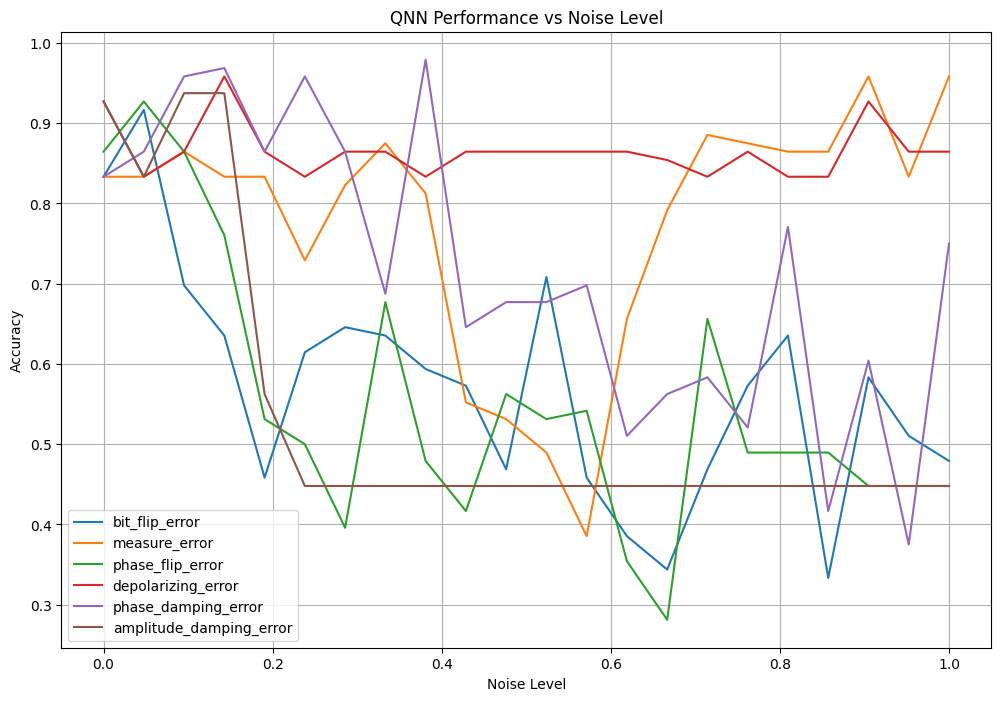

In [74]:
plt.figure(figsize=(12, 8))
for i in results.keys():
    plt.plot(p_values, results[i], label=i)
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.title('QNN Performance vs Noise Level')
plt.legend()
plt.grid(True)
plt.show()